In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils
from keras import initializers
from keras import backend as K
from keras.callbacks import TensorBoard
import keras

Using TensorFlow backend.


## training params

In [19]:

batch_size = 128
epochs = 10

pool_size = (2, 2)                    # size of poolin area for max pooling
prob_drop_conv = 0.2                  # drop probability for dropout @ conv layer
prob_drop_hidden = 0.5                # drop probability for dropout @ fc layer

## data params

In [3]:
# data params
nb_classes = 10


## Load MNIST dataset

In [4]:
(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = mnist.load_data()
print('X_train_raw original shape:', X_train_raw.shape)

X_train_raw original shape: (60000, 28, 28)


### Reshape Data from image matrix to array & normalize


In [5]:
if K.image_dim_ordering() == 'th':

    # Theano
    X_train = X_train_raw.reshape(X_train_raw.shape[0], 1, X_train_raw.shape[1], X_train_raw.shape[2]).astype('float32')
    X_train /= 255.

    X_test = X_test_raw.reshape(X_test_raw.shape[0], 1, X_test_raw.shape[1], X_test_raw.shape[2]).astype('float32')
    X_test /= 255.
    
    input_shape = (1, X_train_raw.shape[1], X_train_raw.shape[2])
    
else:
    
    # TensorFlow
    X_train = X_train_raw.reshape(X_train_raw.shape[0], X_train_raw.shape[1], X_train_raw.shape[2], 1).astype('float32')
    X_train /= 255.

    X_test = X_test_raw.reshape(X_test_raw.shape[0], X_test_raw.shape[1], X_test_raw.shape[2], 1).astype('float32')
    X_test /= 255.
    
    input_shape = (X_train_raw.shape[1], X_train_raw.shape[2], 1)
    
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('input_shape: ', input_shape)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)
input_shape:  (28, 28, 1)


In [6]:
Y_train = np_utils.to_categorical(Y_train_raw)

Y_test = np_utils.to_categorical(Y_test_raw)

## Convolutional Network model

In [7]:
model = Sequential()

# conv1 layer
model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='random_normal', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv2 layer
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Dropout(prob_drop_conv))

# conv3 layer
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size, strides=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(prob_drop_conv))

# fc1 layer
# why is it 625 here??
model.add(Dense(units=625, kernel_initializer='random_normal'))
model.add(Activation('relu'))
model.add(Dropout(prob_drop_hidden))

# fc2 layer
model.add(Dense(units=10, kernel_initializer='random_normal'))
model.add(Activation('softmax'))
          
model.compile(optimizer=RMSprop(lr=0.001, rho=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

## Train

In [20]:
tensorboard_callback = TensorBoard(log_dir='./logs/mnist_tensorboard', histogram_freq=1, write_graph=True, write_grads=True, batch_size=2*batch_size, write_images=True)

In [8]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, shuffle=True, validation_split=0.15, verbose=1, callbacks=[tensorboard_callback])

Train on 51000 samples, validate on 9000 samples
Epoch 1/20
51000/51000 [==============================] - 9s 170us/step - loss: 0.2961 - acc: 0.9029 - val_loss: 0.0618 - val_acc: 0.9818
Epoch 2/20
51000/51000 [==============================] - 8s 154us/step - loss: 0.0787 - acc: 0.9748 - val_loss: 0.0394 - val_acc: 0.9883
Epoch 3/20
51000/51000 [==============================] - 8s 154us/step - loss: 0.0577 - acc: 0.9828 - val_loss: 0.0321 - val_acc: 0.9908
Epoch 4/20
51000/51000 [==============================] - 8s 152us/step - loss: 0.0480 - acc: 0.9852 - val_loss: 0.0345 - val_acc: 0.9917
Epoch 5/20
51000/51000 [==============================] - 8s 154us/step - loss: 0.0413 - acc: 0.9869 - val_loss: 0.0266 - val_acc: 0.9924
Epoch 6/20
51000/51000 [==============================] - 8s 155us/step - loss: 0.0363 - acc: 0.9889 - val_loss: 0.0277 - val_acc: 0.9923
Epoch 7/20
51000/51000 [==============================] - 8s 152us/step - loss: 0.0337 - acc: 0.9895 - val_loss: 0.0277 - v

In [9]:
history.history

{'acc': [0.90288235295987596,
  0.9748235294211145,
  0.98276470588235298,
  0.98521568628385958,
  0.98686274511673866,
  0.98888235294117643,
  0.98954901960784314,
  0.99013725491131055,
  0.99123529412699685,
  0.99094117647058821,
  0.99149019607843136,
  0.99211764705882355,
  0.99249019608778111,
  0.99300000000934974,
  0.99315686274509807,
  0.99296078432307522,
  0.99341176470588233,
  0.99300000000934974,
  0.99360784313725492,
  0.99325490196078436],
 'loss': [0.29611120167666788,
  0.078699115976399073,
  0.057676971705228675,
  0.047984794721883883,
  0.041334370381107516,
  0.036325947018815023,
  0.033719214828575358,
  0.031594835260481229,
  0.027289767437413626,
  0.028425582074395873,
  0.027705100986102193,
  0.025189072179480219,
  0.023814203491251844,
  0.022920476152890307,
  0.024120990171736363,
  0.023694442669404486,
  0.022636981999830288,
  0.022696842450785504,
  0.022348561818492325,
  0.023340939320943447],
 'val_acc': [0.98177777777777775,
  0.9883333

## Evaluate

In [10]:
evaluation = model.evaluate(X_test, Y_test, batch_size=2*batch_size, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.4f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 46us/step
Summary: Loss over the test dataset: 0.02, Accuracy: 0.99


## Predict

In [11]:
test_predictions = model.predict(X_test)
test_prediction_ids = test_predictions.argmax(axis=1)

## Plot some predictions

In [12]:
from matplotlib import pyplot as plt
import numpy as np
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [13]:
n_view = 4

idx = np.random.permutation(range(0,len(X_test)))[:n_view]

imgs = X_test[idx,:].reshape(n_view, X_train_raw.shape[1], X_train_raw.shape[2])
titles = test_prediction_ids[idx]

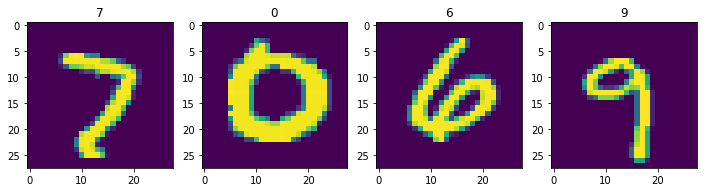

In [14]:
plots(imgs, titles=titles)
plt.show()

## Examine wrong predictions


In [15]:
# convert category vector into category label
Y_test_ids = Y_test.argmax(axis=1)

# compare the predicted and actual category labels to find error predictions
errors = np.array(Y_test_ids) - np.array(test_prediction_ids)

# gather all the wrong prediction indices
errors_idx = np.nonzero(errors)[0]

In [16]:
n_view = 4

random_idx = np.random.permutation(range(0,len(errors_idx)))[:n_view]

# grab a sampling of error indices 
random_errors_idx = errors_idx[random_idx]

# and prepare their images and labels
imgs = X_test[random_errors_idx,:].reshape(n_view, X_train_raw.shape[1], X_train_raw.shape[2])
titles = test_prediction_ids[random_errors_idx]

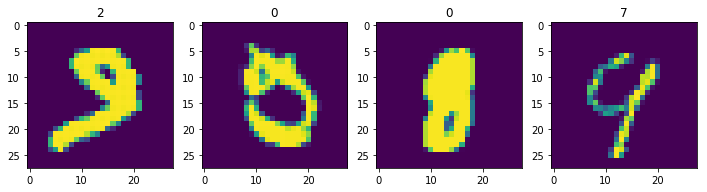

In [17]:
plots(imgs, titles=titles)
plt.show()

In [18]:
len(errors_idx) / 10000.


0.0056